# Tiff Parsing with BigEarthNet

## 2020년 09월 02일 안상호

~~[BigEarthNet](http://bigearth.net/)의 제공 코드를 통해서 데이터를 학습시켜본다~~

> `tif` 파일 읽어서 RGB 조합후 이미지와 라벨형태로 가공 

---

# Requirement

In [1]:
from pathlib import Path

# Sangho Workspace|
root_dir = Path("/home/jovyan/")
base_dir = root_dir  / 'Land-Cls'

data_path = base_dir / "data" 

In [2]:
import sys
import os

# Google Colab Version
# sys.path.append(str(base_dir))


# Local Version
PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser("__file__"))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

In [3]:
!ls ../data/bigearth/BigEarthNet-v1.0/S2A_MSIL2A_20170613T101031_0_45


S2A_MSIL2A_20170613T101031_0_45_B01.tif
S2A_MSIL2A_20170613T101031_0_45_B02.tif
S2A_MSIL2A_20170613T101031_0_45_B03.tif
S2A_MSIL2A_20170613T101031_0_45_B04.tif
S2A_MSIL2A_20170613T101031_0_45_B05.tif
S2A_MSIL2A_20170613T101031_0_45_B06.tif
S2A_MSIL2A_20170613T101031_0_45_B07.tif
S2A_MSIL2A_20170613T101031_0_45_B08.tif
S2A_MSIL2A_20170613T101031_0_45_B09.tif
S2A_MSIL2A_20170613T101031_0_45_B11.tif
S2A_MSIL2A_20170613T101031_0_45_B12.tif
S2A_MSIL2A_20170613T101031_0_45_B8A.tif
S2A_MSIL2A_20170613T101031_0_45_labels_metadata.json


## 패키지 설치 및 불러오기 

In [4]:
# !sudo apt-get install libgdal-dev
# !conda install GDAL
# |

In [5]:
import tifffile as tiff
import pandas as pd

import json

import matplotlib.pyplot as plt
import numpy as np

# 1. BigEarthNet 데이터 구조

> https://gitlab.tubit.tu-berlin.de/rsim/bigearthnet-tools

In [7]:
json_path = data_path / "bigearth" / "BigEarthNet-v1.0" / "S2A_MSIL2A_20170613T101031_0_45" / "S2A_MSIL2A_20170613T101031_0_45_labels_metadata.json"

In [8]:
with open(str(json_path), "r") as st_json:

    st_python = json.load(st_json)




In [9]:
import json

# with를 이용해 파일을 연다.
# json 파일은 같은 폴더에 있다고 가정!

with open(json_path) as json_file:
    json_data = json.load(json_file)
    
    


In [10]:
json_data.keys()


dict_keys(['labels', 'coordinates', 'projection', 'tile_source', 'acquisition_date'])

In [11]:
json_data["tile_source"]

'S2A_MSIL1C_20170613T101031_N0205_R022_T34VER_20170613T101025.SAFE'

In [12]:
pd.read_csv(data_path / "patches_with_seasonal_snow.csv")#.iloc[1]

,S2B_MSIL2A_20170831T095029_27_76
0,S2B_MSIL2A_20170831T095029_27_85
1,S2B_MSIL2A_20170831T095029_29_75
2,S2B_MSIL2A_20170831T095029_30_75
3,S2B_MSIL2A_20170831T095029_30_78
4,S2B_MSIL2A_20170831T095029_31_76
...,...
61701,S2A_MSIL2A_20180228T101021_43_6
61702,S2A_MSIL2A_20180228T101021_43_8
61703,S2A_MSIL2A_20180228T101021_43_11
61704,S2A_MSIL2A_20180228T101021_43_13


In [13]:
pd.read_csv(data_path / "patches_with_cloud_and_shadow.csv")

,S2A_MSIL2A_20170717T113321_35_89
0,S2A_MSIL2A_20170717T113321_39_84
1,S2B_MSIL2A_20171112T114339_0_13
2,S2B_MSIL2A_20171112T114339_0_52
3,S2B_MSIL2A_20171112T114339_0_53
4,S2B_MSIL2A_20171112T114339_0_54
...,...
9274,S2B_MSIL2A_20180204T94161_73_13
9275,S2B_MSIL2A_20180204T94161_74_6
9276,S2B_MSIL2A_20180204T94161_76_5
9277,S2B_MSIL2A_20180204T94161_76_6


# 2. Combine RGB and label

RGB 밴드를 각각 읽어오고 이를 병합하여 이미지화하고 라벨과 함께 학습 가능한 데이터로 만든다. 

S2A_MSIL2A_20170613T101031_0_45_B02.tif

> https://gitlab.tubit.tu-berlin.de/rsim/bigearthnet-models

In [6]:
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np

def merge_rgb(red, green, blue):
    return np.dstack((red,green,blue))


# For BigEarthNet

def read_json(json_path):
    with open(json_path) as json_file:
        return json.load(json_file)
    
def save_tiffimage(image, save_path, method="RGB"):
    tiff.imsave(save_path, image)
    
files = os.listdir(data_path / "bigearth" / "BigEarthNet-v1.0")
len(files)

590326

In [8]:
!ls ../data/bigearth/BigEarthNet-v1.0/S2A_MSIL2A_20170613T101031_0_57
# !pip3 install matplotlib

S2A_MSIL2A_20170613T101031_0_57_B01.tif
S2A_MSIL2A_20170613T101031_0_57_B02.tif
S2A_MSIL2A_20170613T101031_0_57_B03.tif
S2A_MSIL2A_20170613T101031_0_57_B04.tif
S2A_MSIL2A_20170613T101031_0_57_B05.tif
S2A_MSIL2A_20170613T101031_0_57_B06.tif
S2A_MSIL2A_20170613T101031_0_57_B07.tif
S2A_MSIL2A_20170613T101031_0_57_B08.tif
S2A_MSIL2A_20170613T101031_0_57_B09.tif
S2A_MSIL2A_20170613T101031_0_57_B11.tif
S2A_MSIL2A_20170613T101031_0_57_B12.tif
S2A_MSIL2A_20170613T101031_0_57_B8A.tif
S2A_MSIL2A_20170613T101031_0_57_labels_metadata.json


In [22]:
tiff.Image

AttributeError: module 'tifffile' has no attribute 'Image'

In [19]:
im_name = "S2B_MSIL2A_20180204T94161_74_6" # files[400340]

im_red = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B04.tif") #.transpose([1, 2, 0])
im_green = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B03.tif") #.transpose([1, 2, 0])
im_blue = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B02.tif")

labels = read_json(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_labels_metadata.json")["labels"]

print(labels)
# show = tiff.imshow(merge_rgb(im_red, im_green, im_blue))
# plt.axis('off')
# plt.savefig(data_path / "test.jpg")

# tiff.imwrite(data_path / "test.jpg", merge_rgb(im_red, im_green, im_blue))

# tiff.

fig = tiff.imshow(merge_rgb(im_red, im_green, im_blue))[0]
# type(fig)

plt.axis('off')
fig.savefig(bigearth_path / "test_22.jpg", bbox_inches='tight', pad_inches=0.0)
fig.clf()
plt.close(fig)
# fig.axis('off')
# plt.close(fig)

# type()

['Water bodies']


In [15]:
plt.savefig(bigearth_path / "image" / image_name)

NameError: name 'image_name' is not defined

In [38]:
import PIL

tiff.
# plt.imsave(data_path / "test.jpg", merge_rgb(im_red, im_green, im_blue), cmap='Greys')
# PIL.Image.fromarray(merge_rgb(im_red, im_green, im_blue))

ValueError: Image RGB array must be uint8 or floating point; found uint16

In [1]:

tiff.imshow(merge_rgb(im_red, im_green, im_blue))

plt.axis('off')
# plt.savefig(data_path / "test.png", bbox_inches='tight')

NameError: name 'tiff' is not defined

In [74]:
np.dstack((
    im_red.reshape([1, 120, 120]),
    im_green.reshape([1, 120, 120])  
))


(1, 120, 240)

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f799e79d150>)

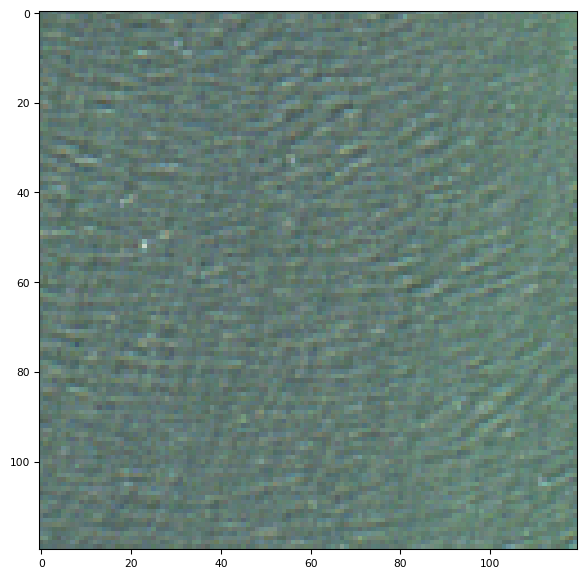

In [77]:
im_rgb = np.dstack((im_red,im_green,im_blue))

tiff.imshow(im_rgb)

# 3. Image Downlaod and Labels

1. 조합된 RGB 다운로드 
2. 이미지이름-라벨(`;` 구분) 형태의 데이터셋

In [7]:
import gc

# gc.collect()

In [8]:
bigearth_path = data_path / "bigearth"
output_path = bigearth_path / "train-labels.csv"

pd.read_csv(output_path)

,image_name,label
0,S2A_MSIL2A_20180508T104031_26_63.jpg,Non-irrigated arable land;Pastures;Land princi...
1,S2A_MSIL2A_20180318T093031_50_50.jpg,Non-irrigated arable land;Pastures;Complex cul...
2,S2A_MSIL2A_20171002T112112_74_52.jpg,"Land principally occupied by agriculture, with..."
3,S2B_MSIL2A_20180204T94161_76_26.jpg,Coniferous forest;Mixed forest;Transitional wo...
4,S2A_MSIL2A_20171015T095031_26_65.jpg,Discontinuous urban fabric;Non-irrigated arabl...
...,...,...
400670,S2A_MSIL2A_20171002T094031_81_9.jpg,Discontinuous urban fabric;Non-irrigated arabl...
400671,S2A_MSIL2A_20171101T094131_76_16.jpg,"Land principally occupied by agriculture, with..."
400672,S2A_MSIL2A_20180430T094031_82_57.jpg,Non-irrigated arable land;Complex cultivation ...
400673,S2A_MSIL2A_20171221T112501_84_63.jpg,Olive groves;Agro-forestry areas;Broad-leaved ...


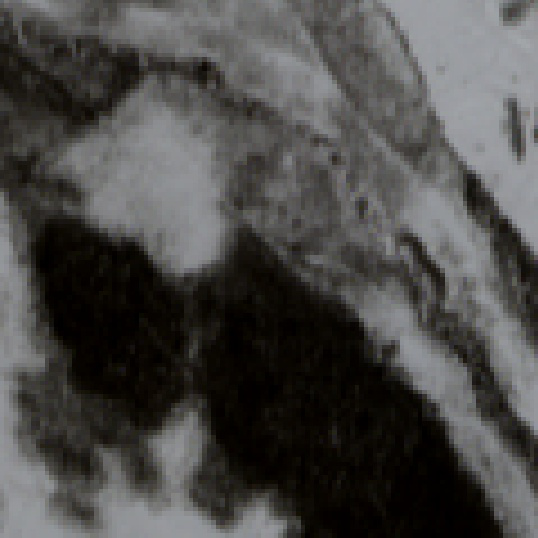

In [10]:
import PIL

PIL.Image.open(bigearth_path / "image" / "S2B_MSIL2A_20180417T102019_70_21.jpg")

In [9]:
files[400674]

'S2B_MSIL2A_20180417T102019_70_21'

In [11]:
# result = pd.DataFrame(columns=["image_name", "label"])
# result.to_csv(output_path, encoding="utf-8", index=False)

In [ ]:
for idx, file in enumerate(files[400675:]):
    if idx % 5000 == 0: gc.collect()
    image_name = f"{file}.jpg"
    
    im_red = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B04.tif") #.transpose([1, 2, 0])
    im_green = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B03.tif") #.transpose([1, 2, 0])
    im_blue = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B02.tif")
    
    fig = tiff.imshow(merge_rgb(im_red, im_green, im_blue))[0]
    plt.axis('off')
    fig.savefig(bigearth_path / "image" / image_name, bbox_inches='tight', pad_inches=0.0)
    fig.clf()
    plt.close(fig)

    label = read_json(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_labels_metadata.json")["labels"]
    result = pd.DataFrame({"image_name": [image_name], "label": [";".join(label)]})
    result.to_csv(output_path, mode='a', encoding="utf-8", index=False, header=False)


In [ ]:
labels = []
for file in files[100001:200000]:
    image_name = f"{file}.jpg"
    
    im_red = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B04.tif") #.transpose([1, 2, 0])
    im_green = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B03.tif") #.transpose([1, 2, 0])
    im_blue = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B02.tif")

    label = read_json(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_labels_metadata.json")["labels"]
    result = pd.DataFrame({"image_name": [image_name], "label": [";".join(label)]})
    result.to_csv(output_path, mode='a', encoding="utf-8", index=False, header=False)

    tiff.imshow(merge_rgb(im_red, im_green, im_blue))
    plt.axis('off')
    plt.savefig(bigearth_path / "image" / image_name, bbox_inches='tight')
    plt.close()

In [ ]:
labels = []
for file in files[200001:300000]:
    
    image_name = f"{file}.jpg"
    
    im_red = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B04.tif") #.transpose([1, 2, 0])
    im_green = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B03.tif") #.transpose([1, 2, 0])
    im_blue = tiff.imread(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_B02.tif")

    label = read_json(bigearth_path / "BigEarthNet-v1.0" / f"{file}" / f"{file}_labels_metadata.json")["labels"]
    result = pd.DataFrame({"image_name": [image_name], "label": [";".join(label)]})
    result.to_csv(output_path, mode='a', encoding="utf-8", index=False, header=False)

    tiff.imshow(merge_rgb(im_red, im_green, im_blue))
    plt.axis('off')
    plt.savefig(bigearth_path / "image" / image_name, bbox_inches='tight')
    plt.close()

Non-irrigated arable land;Pastures;Mixed forest;Peatbogs


(-0.5, 119.5, 119.5, -0.5)

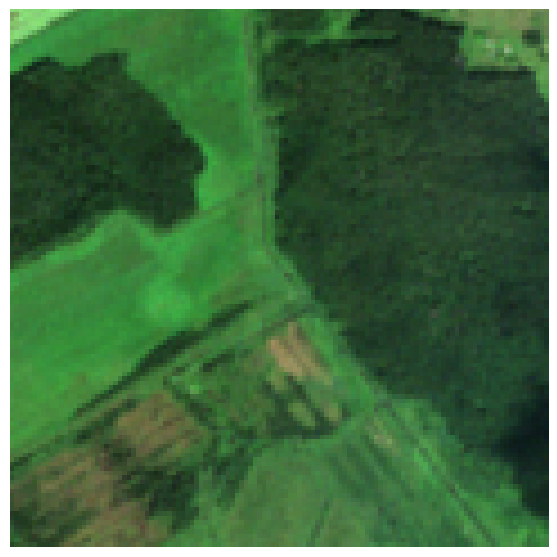

In [23]:
im_name = files[400340]

im_red = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B04.tif") #.transpose([1, 2, 0])
im_green = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B03.tif") #.transpose([1, 2, 0])
im_blue = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B02.tif")

labels = read_json(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_labels_metadata.json")["labels"]

print(";".join(labels))
tiff.imshow(merge_rgb(im_red, im_green, im_blue))
plt.axis('off')